In [5]:
import pandas as pd
planilha = pd.read_excel(r'C:\Users\joaoh\OneDrive\Área de Trabalho\Sample - Superstore.xls')
df = pd.DataFrame(planilha)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ano'] = df['Order Date'].dt.year
display(df)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ano
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017


In [6]:
#exercício 1
filtro = df['Category'] == 'Office Supplies'
dados_filtrados = df[filtro]
df['Valor_Total'] = df.apply(lambda row: row['Sales'] * row['Quantity'], axis=1)
juntos = dados_filtrados.groupby(['City', 'Valor_Total']).size().reset_index(name='Count')
ordenado = juntos.sort_values(by='Valor_Total', ascending= False)
cidade = ordenado['City']
cidade.head(1)


KeyError: 'Valor_Total'

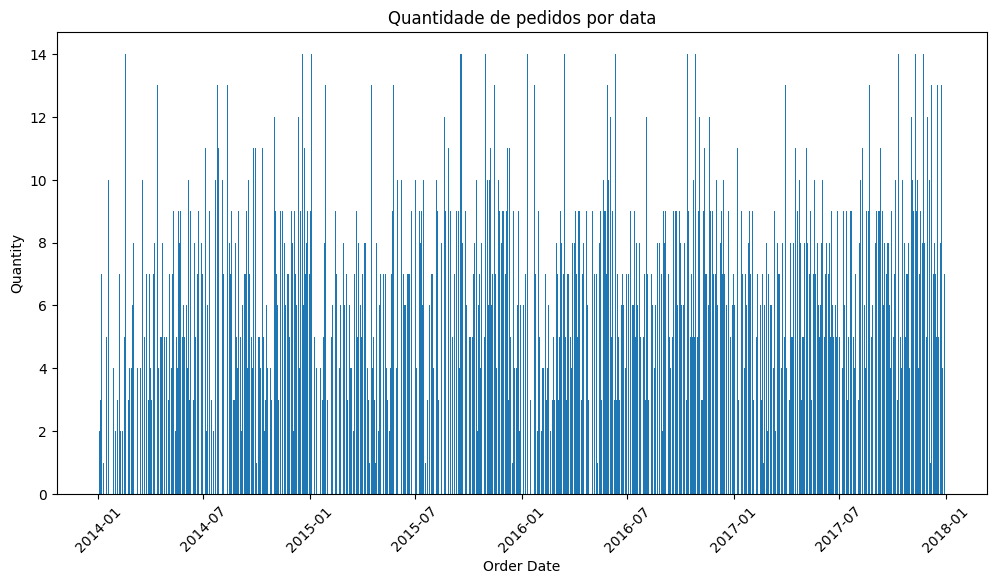

In [ ]:
#exercício 2
import matplotlib.pyplot as plt
juntos2 = df.groupby(['Order Date', 'Quantity']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))

plt.bar(juntos2['Order Date'], juntos2['Quantity'])

plt.xlabel('Order Date')  
plt.ylabel('Quantity')  
plt.title('Quantidade de pedidos por data') 

plt.xticks(rotation=45)

plt.show()


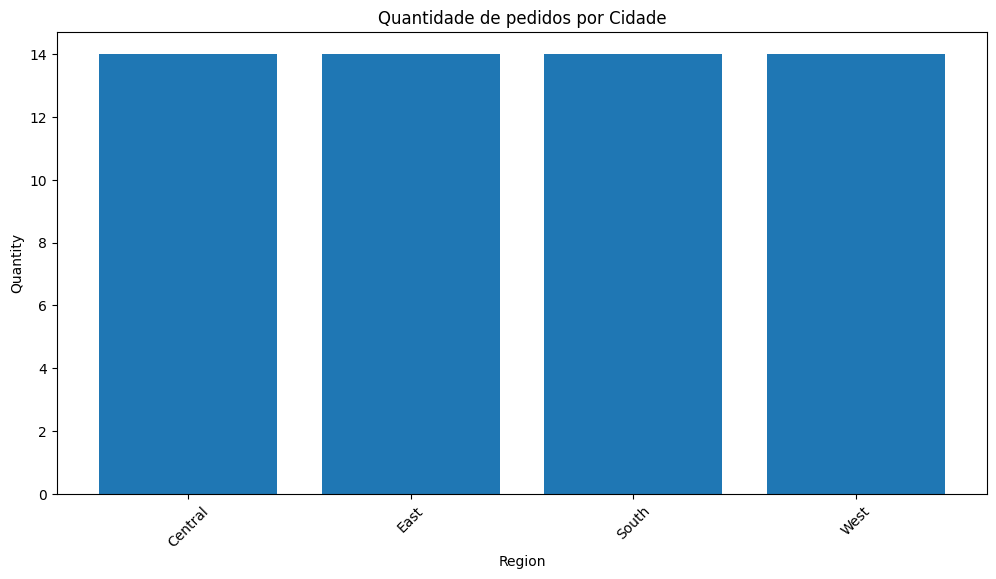

In [ ]:
#exercício 3
import matplotlib.pyplot
juntos3 = df.groupby(['Region', 'Quantity']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))

plt.bar(juntos3['Region'], juntos3['Quantity'])

plt.xlabel('Region')  
plt.ylabel('Quantity')  
plt.title('Quantidade de pedidos por Cidade') 

plt.xticks(rotation=45)

plt.show()



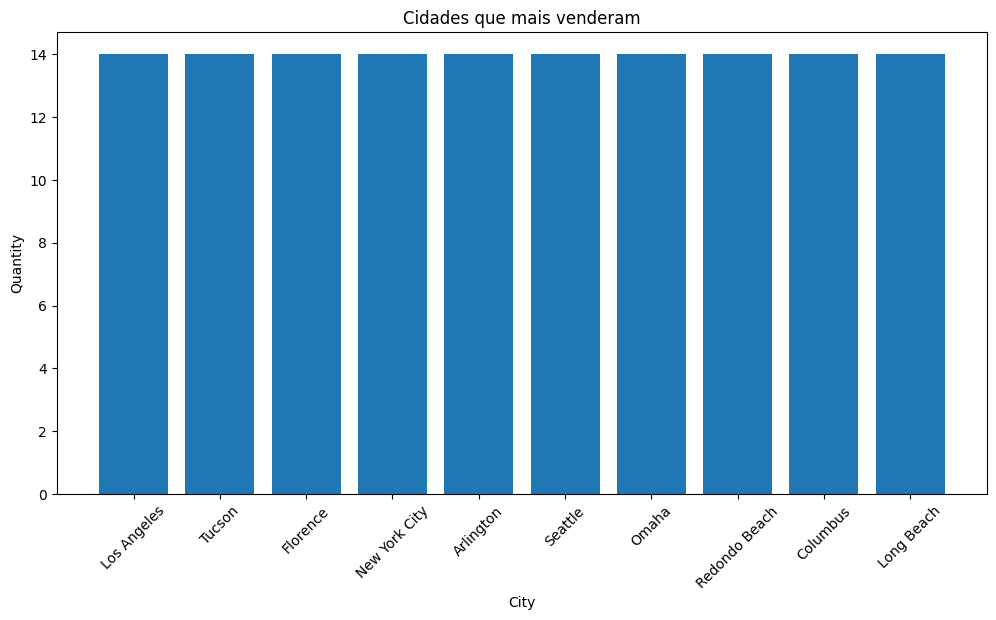

In [ ]:
#exercício 4
import matplotlib.pyplot
juntos3 = df.groupby(['City', 'Quantity']).size().reset_index(name='Count').sort_values(by='Quantity', ascending= False).head(10)
plt.figure(figsize=(12, 6))

plt.bar(juntos3['City'], juntos3['Quantity'])

plt.xlabel('City')  
plt.ylabel('Quantity')  
plt.title('Cidades que mais venderam') 

plt.xticks(rotation=45)

plt.show()

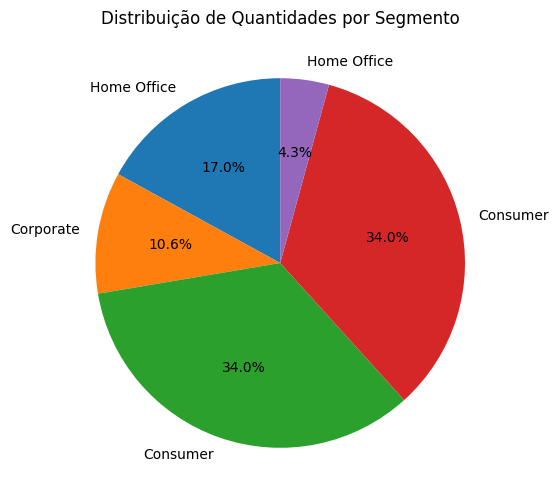

In [ ]:
#exercício 5
import matplotlib.pyplot as plt
juntos5 = df.groupby(['Segment', 'Quantity']).size().reset_index(name='Count').sort_values(by='Quantity', ascending= False).head(5)


segments = juntos5['Segment']
quantities = juntos5['Quantity']
counts = juntos5['Count']

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=segments, autopct='%1.1f%%', startangle=90)

plt.title('Distribuição de Quantidades por Segmento')

plt.show()


In [14]:
# exercício 6
agrupado_novo = df.groupby(['Ano', 'Segment'])['Quantity'].sum().reset_index()

display(agrupado_novo)


,Ano,Segment,Quantity
0,2014,Consumer,4053
1,2014,Corporate,2331
2,2014,Home Office,1197
3,2015,Consumer,4272
4,2015,Corporate,2413
5,2015,Home Office,1294
6,2016,Consumer,4914
7,2016,Corporate,3106
8,2016,Home Office,1817
9,2017,Consumer,6282
